## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6 ตัวจำแนกแบบเบส์

### 5.เขียนโปรแกรมสำหรับ plot decision boundary เปรียบเทียบระหว่าง LDA, QDA และ Logistic regression 
โดยอาจจะมีการเพิ่มพจน์ second order polynomial โดยอาจจะใช้การสุ่มข้อมูลในรูปแบบต่างๆดังนี้ https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py หรือ https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle®Dataset=reg-plane&learningRate=0.03®ularizationRate=0&noise=0&networkShape=4,2&seed=0.87693&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.model_selection import train_test_split

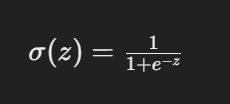

In [8]:
# ฟังก์ชัน Sigmoid สำหรับ Logistic Regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

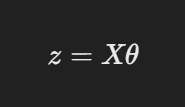
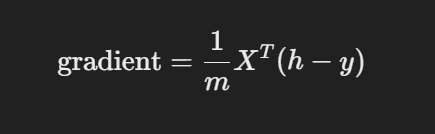
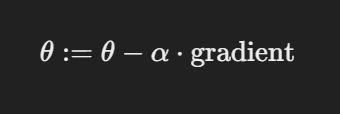
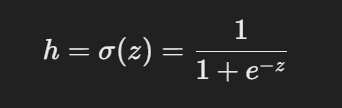
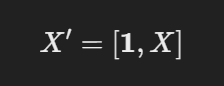
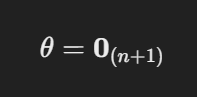

In [9]:
# ฟังก์ชัน Logistic Regression
def logistic_regression(X, y, lr=0.01, iterations=1000):

    X = np.c_[np.ones(X.shape[0]), X]  # เพิ่ม bias term
    theta = np.zeros(X.shape[1])

    for _ in range(iterations):
        z = np.dot(X, theta)  # คำนวณ z = X @ theta
        h = sigmoid(z)  # คำนวณค่า h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size  # คำนวณ gradient
        theta -= lr * gradient  # อัปเดต theta

    return theta


In [10]:
# ฟังก์ชันคำนวณ Decision Boundary ของ Logistic Regression
def logistic_decision_function(X, theta):
    X = np.c_[np.ones(X.shape[0]), X]
    return np.dot(X, theta)

In [11]:
# ฟังก์ชัน Linear Discriminant Analysis (LDA)
def lda_fit(X, y):

    classes = np.unique(y)
    means = {c: X[y == c].mean(axis=0) for c in classes}
    priors = {c: len(X[y == c]) / len(X) for c in classes}
    covariance = np.cov(X, rowvar=False)
    inv_cov = np.linalg.inv(covariance)
    return means, priors, inv_cov

In [12]:
def lda_decision_function(X, means, priors, inv_cov):
    """
    คำนวณ Decision Boundary ของ LDA
    """
    scores = []
    for x in X:
        score = []
        for c in means.keys():
            mean_diff = x - means[c]
            score.append(-0.5 * mean_diff.T @ inv_cov @ mean_diff + np.log(priors[c]))  # Decision function
        scores.append(score)
    return np.array(scores)

In [13]:
def qda_fit(X, y):
    """
    ฟังก์ชันคำนวณค่าเฉลี่ย, Prior Probability และ Covariance Matrix สำหรับ QDA
    """
    classes = np.unique(y)
    means = {c: X[y == c].mean(axis=0) for c in classes}
    priors = {c: len(X[y == c]) / len(X) for c in classes}
    covariances = {c: np.cov(X[y == c], rowvar=False) for c in classes}
    return means, priors, covariances

In [14]:
def qda_decision_function(X, means, priors, covariances):
    """
    คำนวณ Decision Boundary ของ QDA
    """
    scores = []
    for x in X:
        score = []
        for c in means.keys():
            mean_diff = x - means[c]
            inv_cov = np.linalg.inv(covariances[c])
            score.append(-0.5 * mean_diff.T @ inv_cov @ mean_diff - 0.5 * np.log(np.linalg.det(covariances[c])) + np.log(priors[c]))  # Decision function
        scores.append(score)
    return np.array(scores)

In [15]:
# การเตรียมข้อมูล
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
]

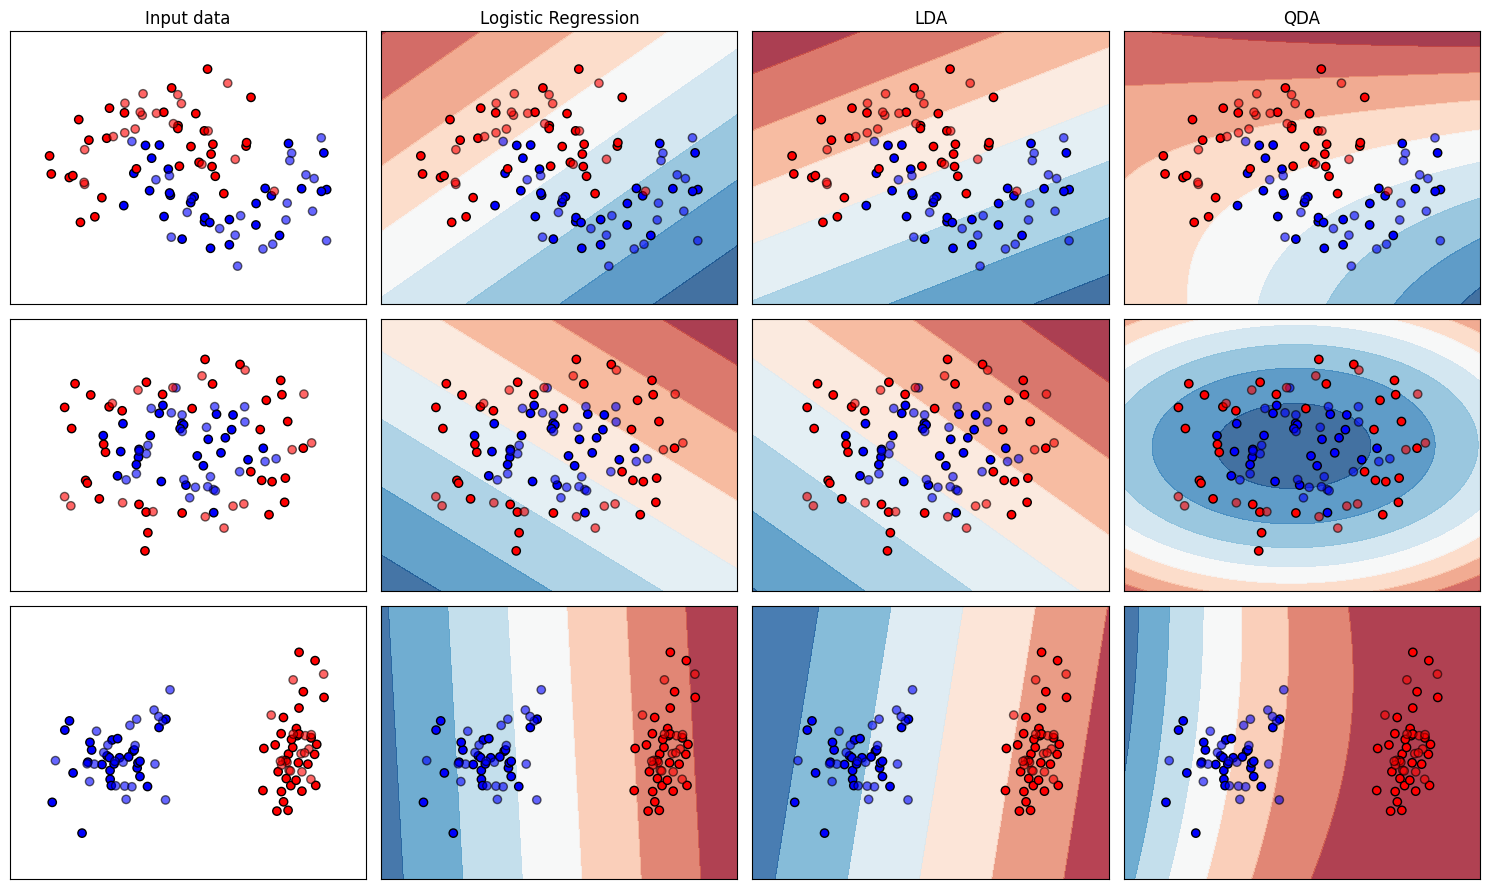

In [16]:
# สร้างกราฟ
figure = plt.figure(figsize=(15, 9))
i = 1
# วนลูปผ่านชุดข้อมูล
for ds_cnt, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), 4, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # แสดงจุดข้อมูลการฝึกและทดสอบ
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # Logistic Regression
    theta = logistic_regression(X_train, y_train)
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = logistic_decision_function(np.c_[xx.ravel(), yy.ravel()], theta)
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(len(datasets), 4, i)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title("Logistic Regression")
    i += 1

    # LDA
    means, priors, inv_cov = lda_fit(X_train, y_train)
    Z = lda_decision_function(np.c_[xx.ravel(), yy.ravel()], means, priors, inv_cov)
    Z = Z[:, 1] - Z[:, 0]  # คำนวณการตัดสินใจโดยเปรียบเทียบระหว่างสองคลาส
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(len(datasets), 4, i)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title("LDA")
    i += 1

    # QDA
    means, priors, covariances = qda_fit(X_train, y_train)
    Z = qda_decision_function(np.c_[xx.ravel(), yy.ravel()], means, priors, covariances)
    Z = Z[:, 1] - Z[:, 0]  # คำนวณการตัดสินใจโดยเปรียบเทียบระหว่างสองคลาส
    Z = Z.reshape(xx.shape)

    ax = plt.subplot(len(datasets), 4, i)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title("QDA")
    i += 1

plt.tight_layout()
plt.show()


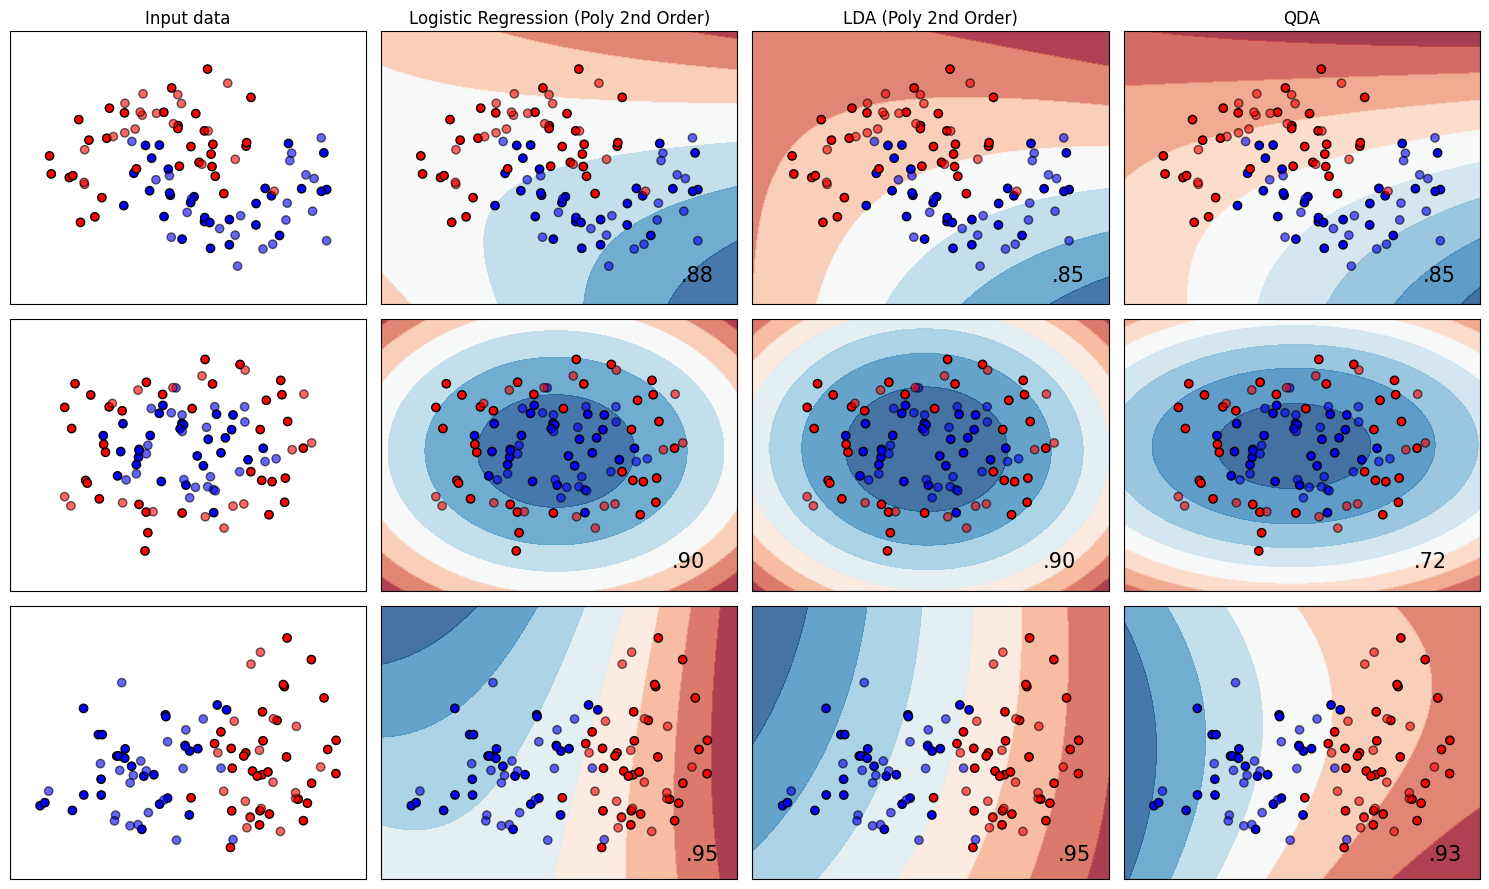

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# ชื่อตัวจำแนกประเภท
names = [
    "Logistic Regression (Poly 2nd Order)",
    "LDA (Poly 2nd Order)",
    "QDA",
]

# ตัวจำแนกประเภทพร้อมพจน์ Second-Order Polynomial
classifiers = [
    make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LogisticRegression(random_state=42)),  # Logistic Regression with Polynomial Features
    make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearDiscriminantAnalysis()),  # LDA with Polynomial Features
    QuadraticDiscriminantAnalysis(),  # QDA (ไม่ต้องเพิ่มพจน์พหุนามเพราะเป็น non-linear อยู่แล้ว)
]

# ชุดข้อมูล
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

# สร้างกราฟ
figure = plt.figure(figsize=(15, 9))
i = 1

# วนลูปผ่านชุดข้อมูล
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # แสดงจุดข้อมูลการฝึกและทดสอบ
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # วนลูปผ่านตัวจำแนกประเภท
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)

        # แสดงจุดข้อมูลการฝึกและทดสอบ
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()
